# DATA MINING - AFL2

Name: Patricia Lowis \
NIM: 0706022110011

In [162]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [163]:
df = pd.read_csv("customer_analysis.csv", sep='\t', index_col = 0)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [165]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [166]:
income_mean = df["Income"].mean()
df["Income"].fillna(income_mean, inplace=True)

In [167]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [168]:
# Label Encoder
label_encoder = LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [169]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Education,2240.0,2.393750,1.124797,0.0,2.00,2.0,3.00,4.0
Marital_Status,2240.0,3.729911,1.076277,0.0,3.00,4.0,5.00,7.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


# Feature Engineering

In [170]:
# Age extraction
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,66
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,69
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,58
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,39
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,42


In [171]:
# Spending power
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,66,1617
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,69,27
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,58,776
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,39,53
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,42,422


In [172]:
# Household Living Arrangement
def Living_with(status):
    if status in [0,1,2,4,6]:
        return 'Alone'
    elif status in [3,5]:
        return 'Couple'
    else:
        return 'Other'

df['Living_with'] = df['Marital_Status'].apply(Living_with)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_with
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,66,1617,Alone
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,69,27,Alone
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,58,776,Couple
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,39,53,Couple
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,42,422,Couple


In [173]:
# Family Dynamics on totalChildren column
df['totalChildren'] = df['Kidhome'] + df['Teenhome']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_with,totalChildren
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,66,1617,Alone,0
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,69,27,Alone,2
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,58,776,Couple,0
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,39,53,Couple,1
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,42,422,Couple,1


In [174]:
# Family Unity
def family_size(row):
    if row['Marital_Status'] in [3,5]:
        return row['Kidhome'] + row['Teenhome'] + 2
    elif row['Marital_Status'] in [0,1,2,4,6]:
        return row['Kidhome'] + row['Teenhome'] + 1

df['Family_Size'] = df.apply(family_size, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_with,totalChildren,Family_Size
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,0,3,11,1,66,1617,Alone,0,1.0
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,0,3,11,0,69,27,Alone,2,3.0
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,0,3,11,0,58,776,Couple,0,2.0
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,0,3,11,0,39,53,Couple,1,3.0
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,0,3,11,0,42,422,Couple,1,3.0


In [175]:
# Is_Parent column
def is_parent(row):
    if row['Kidhome'] + row['Teenhome'] > 0:
        return 'Yes'
    else:
        return 'No'

df['Is_Parent'] = df.apply(is_parent, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_with,totalChildren,Family_Size,Is_Parent
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,0,3,11,1,66,1617,Alone,0,1.0,No
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,0,3,11,0,69,27,Alone,2,3.0,Yes
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,0,3,11,0,58,776,Couple,0,2.0,No
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,0,3,11,0,39,53,Couple,1,3.0,Yes
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,0,3,11,0,42,422,Couple,1,3.0,Yes


In [176]:
# Categorize education level
def education_level(level):
    if level in [0, 1]:
        return '0'
    elif level in [2]:
        return '1'
    elif level in [3]:
        return '2'
    else:
        return '3'

df['Education_Level'] = df['Education'].apply(education_level)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_with,totalChildren,Family_Size,Is_Parent,Education_Level
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,...,3,11,1,66,1617,Alone,0,1.0,No,1
2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,...,3,11,0,69,27,Alone,2,3.0,Yes,1
4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,...,3,11,0,58,776,Couple,0,2.0,No,1
6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,...,3,11,0,39,53,Couple,1,3.0,Yes,1
5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,...,3,11,0,42,422,Couple,1,3.0,Yes,3


In [177]:
# Farewell to Redundancy
df = df.drop(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','Dt_Customer', 'Z_Revenue', 'Z_CostContact'], axis=1)
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,totalChildren,Family_Size,Is_Parent,Education_Level
ID,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,1,66,1617,Alone,0,1.0,No,1
2174,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,69,27,Alone,2,3.0,Yes,1
4141,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,58,776,Couple,0,2.0,No,1
6182,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,39,53,Couple,1,3.0,Yes,1
5324,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,42,422,Couple,1,3.0,Yes,3


In [178]:
# apply label encoding to Living_with
df['Living_with'] = label_encoder.fit_transform(df['Living_with'])

# apply label encoding to Is_Parent
df['Is_Parent'] = label_encoder.fit_transform(df['Is_Parent'])
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,totalChildren,Family_Size,Is_Parent,Education_Level
ID,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,1,66,1617,0,0,1.0,0,1
2174,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,69,27,0,2,3.0,1,1
4141,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,58,776,1,0,2.0,0,1
6182,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,39,53,1,1,3.0,1,1
5324,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,42,422,1,1,3.0,1,3


In [179]:
# StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,totalChildren,Family_Size,Is_Parent,Education_Level
0,0.235327,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,...,-0.11651,-0.097282,2.388846,0.985345,1.679417,-1.346889,-1.264505,-1.759254,-1.584605,-0.506887
1,-0.235826,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,...,-0.11651,-0.097282,-0.418612,1.235733,-0.961275,-1.346889,1.396361,0.445848,0.631072,-0.506887
2,0.773633,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,...,-0.11651,-0.097282,-0.418612,0.317643,0.282673,0.736696,-1.264505,-0.656703,-1.584605,-0.506887
3,-1.022732,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,...,-0.11651,-0.097282,-0.418612,-1.268149,-0.918094,0.736696,0.065928,0.445848,0.631072,-0.506887
4,0.241519,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,...,-0.11651,-0.097282,-0.418612,-1.017761,-0.305254,0.736696,0.065928,0.445848,0.631072,1.586065


# Clustering

In [180]:
df_scaled.isnull().sum()
# drop the null or Nan from Family_Size
df_scaled = df_scaled.dropna(subset=['Family_Size'])

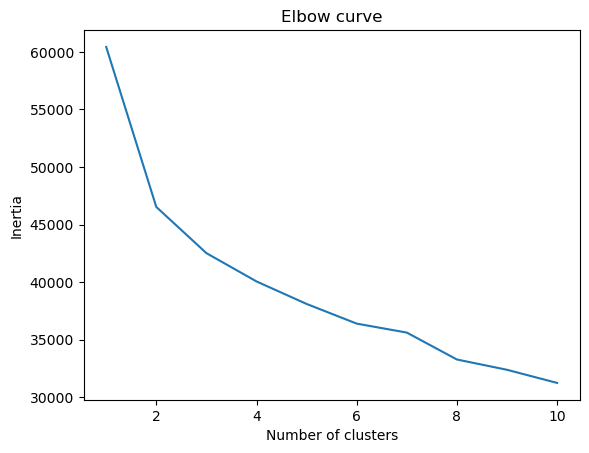

In [181]:
inertia = []

# Range of clusters to test
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()


In [182]:
#perform agglomerative clustering with optimal number of clusters
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(df_scaled)

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


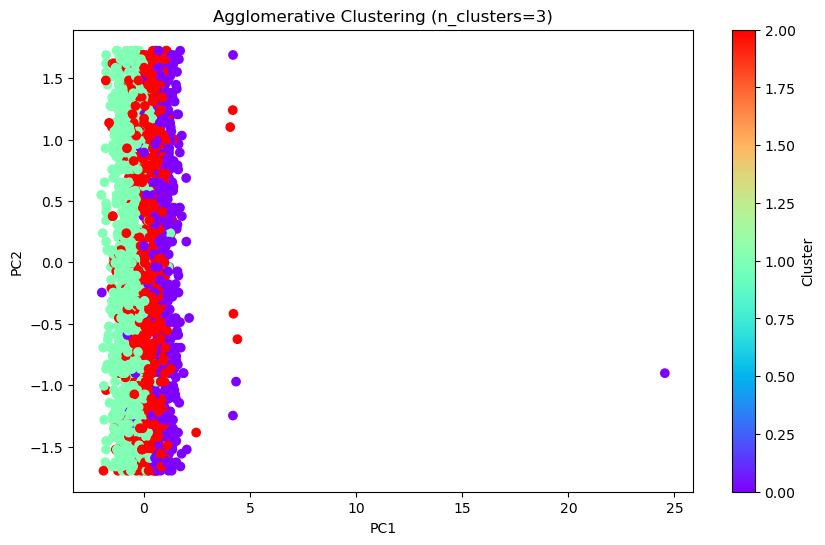

In [186]:
# Create a scatter plot with a larger figure size
plt.figure(figsize=(10, 6))

# Specify the colormap for clusters
cluster_cmap = sns.color_palette('rainbow', as_cmap=True)

# Create the scatter plot with cluster coloring
scatter = plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters, cmap=cluster_cmap)

# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering (n_clusters=3)')

# Add a colorbar to show cluster colors
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()


# Visualization

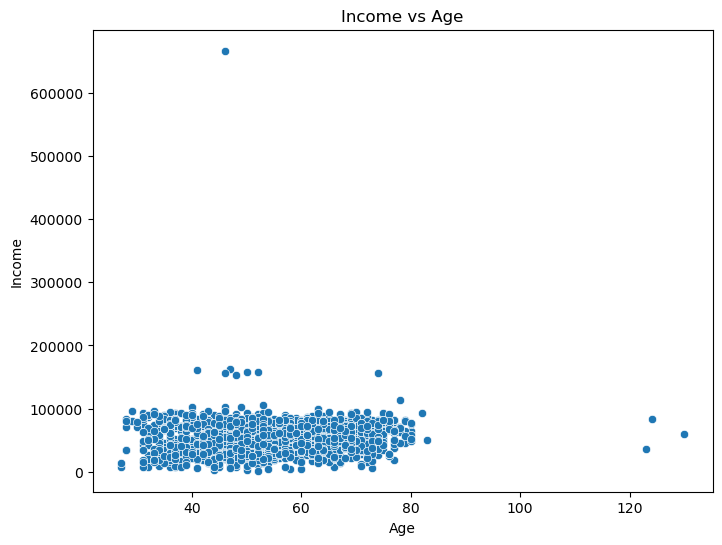

In [187]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Income vs Age')
plt.show()

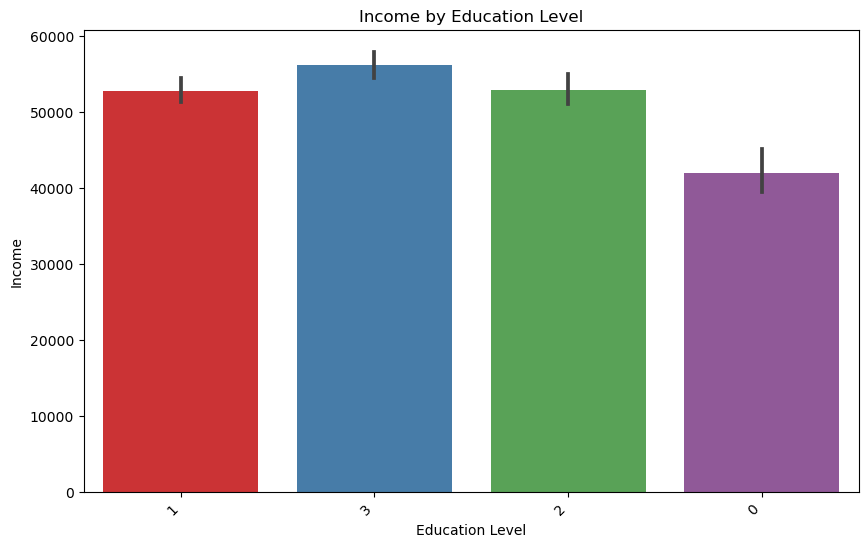

In [188]:
# Create a bar plot with a larger figure size
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Education_Level', y='Income', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Income by Education Level')

# Rotate x-axis labels for better readability
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

/var/folders/2g/62ncn4gn7k508zynq4hr8qkh0000gp/T/ipykernel_997/2822208133.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  campaigns_by_education = df.groupby('Education_Level')['AcceptedCmp1', 'AcceptedCmp2'].sum()


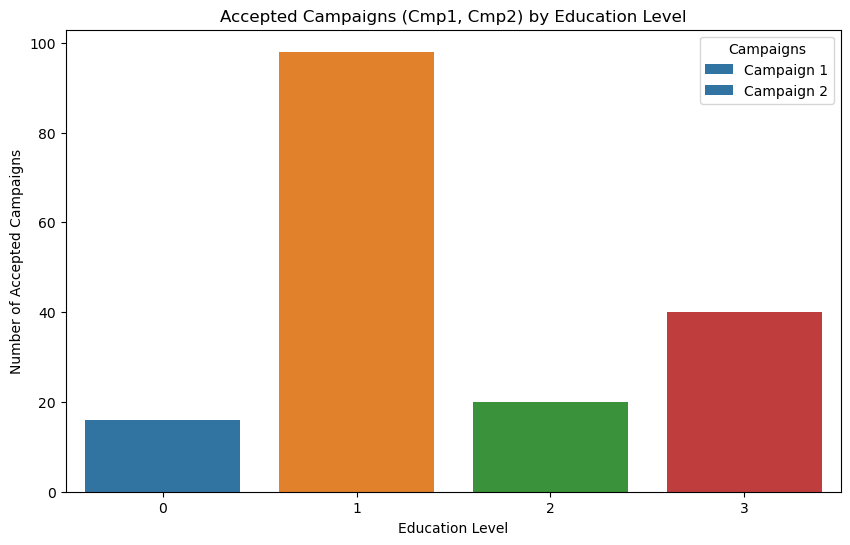

In [189]:
# Group by 'Education_Level' and sum 'AcceptedCmp1' and 'AcceptedCmp2'
campaigns_by_education = df.groupby('Education_Level')['AcceptedCmp1', 'AcceptedCmp2'].sum()

# Create a bar plot with better visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=campaigns_by_education, x=campaigns_by_education.index, y='AcceptedCmp1', label='Campaign 1')
sns.barplot(data=campaigns_by_education, x=campaigns_by_education.index, y='AcceptedCmp2', label='Campaign 2', bottom=campaigns_by_education['AcceptedCmp1'])
ax.set(xlabel='Education Level', ylabel='Number of Accepted Campaigns')
ax.set_title('Accepted Campaigns (Cmp1, Cmp2) by Education Level')
plt.legend(title='Campaigns', loc='upper right')
plt.show()

<Figure size 800x600 with 0 Axes>

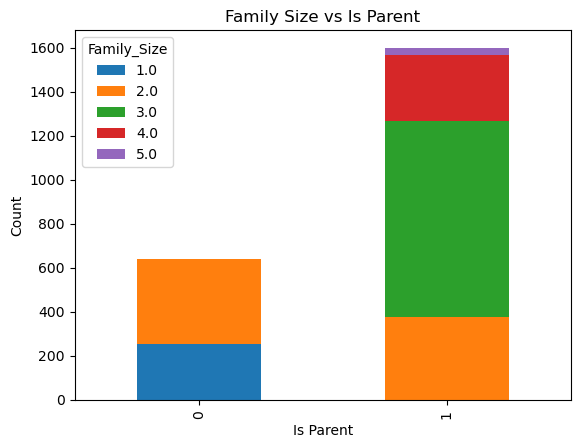

In [190]:
grouped_data = df.groupby(['Is_Parent', 'Family_Size']).size().unstack()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Is Parent')
plt.ylabel('Count')
plt.title('Family Size vs Is Parent')
plt.show()

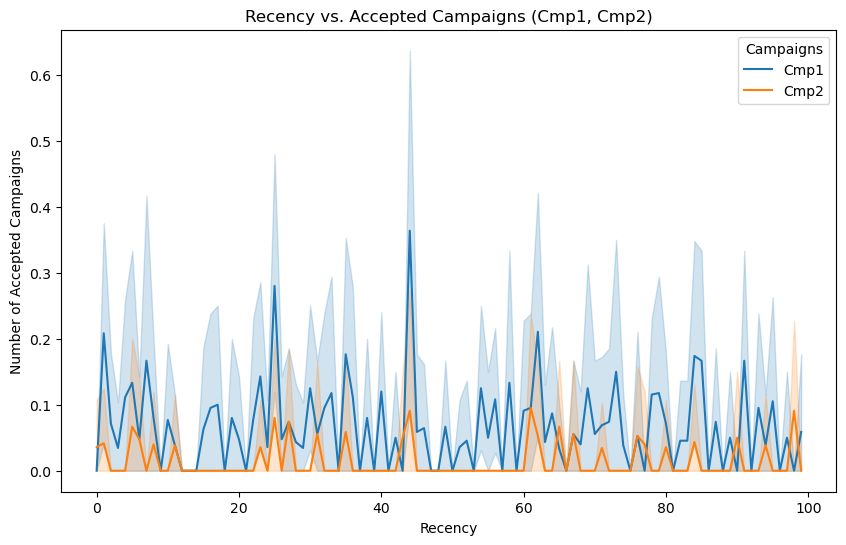

In [191]:
plt.figure(figsize=(10, 6))

# Use a single sns.lineplot to visualize both lines
sns.lineplot(x='Recency', y='AcceptedCmp1', data=df, label='Cmp1')
sns.lineplot(x='Recency', y='AcceptedCmp2', data=df, label='Cmp2')

# Set labels and title
plt.xlabel('Recency')
plt.ylabel('Number of Accepted Campaigns')
plt.title('Recency vs. Accepted Campaigns (Cmp1, Cmp2)')

# Add a legend to differentiate between the two lines
plt.legend(title='Campaigns')
plt.show()

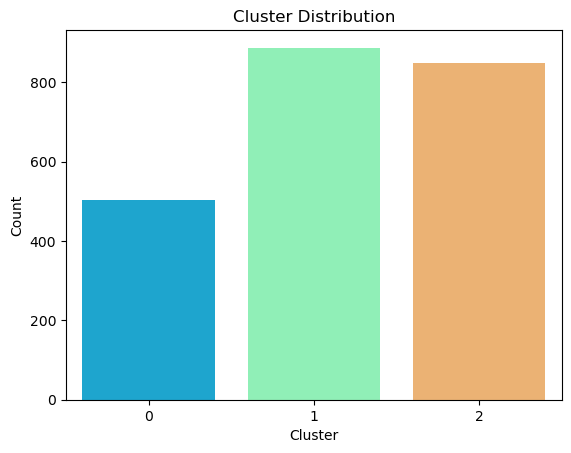

In [192]:
# Create a countplot of the cluster distribution
sns.countplot(x=clusters, palette='rainbow')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

In [193]:
# Step 1: Check the lengths
print(len(df))
print(len(clusters))

# Step 2: If lengths are not the same, drop extra rows or add missing values
if len(df) > len(clusters):
    df = df.iloc[:len(clusters)]
elif len(df) < len(clusters):
    clusters = clusters[:len(df)]

2240
2238


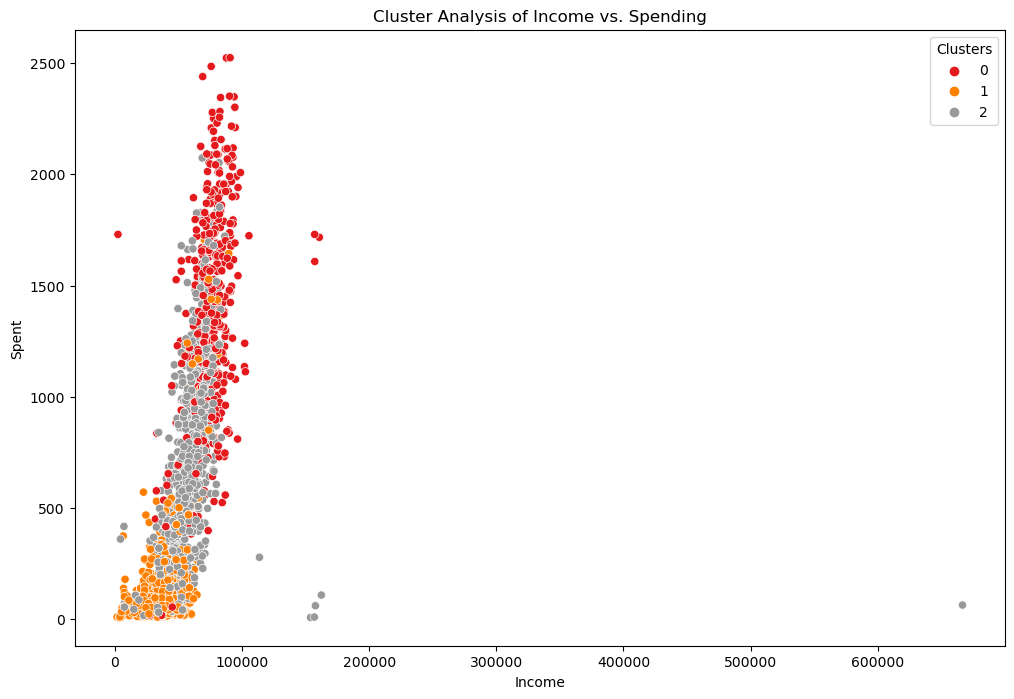

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the colors for different clusters
cluster_colors = sns.color_palette('Set1', as_cmap=True)

# Create a scatter plot with a larger figure size
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Income', y='Spent', data=df, hue=clusters, palette=cluster_colors)

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Cluster Analysis of Income vs. Spending')

# Improve the legend
legend = scatter.legend(title='Clusters', loc='upper right')
legend.set_title('Clusters')

plt.show()
